# DataFrame

# DataFrame is a 2 diamenetional labled data stucture with coloumn of diffrent data type.

Its like a spredsheet or sql table or dict of series of obj. The most commanly used pandas obj like Series, DataFrame aceept many kind of i/p
Dict of 1D ndarray, list, dict or series
2D numpy.ndarray 
Stucture or record ndarray
a series or another datafrane

optionally pass index(row lable), columns (column lable) arg. If you pass and index or columns it show the resulting dataframe 

If axis labels are not passed, they will be constructed from the input data based on common sense rules

# From dict of Series or dicts

The resulting index will be union of the indexes of varies series. if there will be nasted dict, these will be first converted to series . If no coloumn are passed the coulmn will be the oreded list od dict.

In [2]:
import numpy as np
import pandas as pd

In [3]:
d = {
    'one': pd.Series([1.0, 2.0, 3.0], index=['a', 'b', 'c']),
    'two': pd.Series([1.0, 2.0, 3.0, 4.0], index=['a', 'b', 'c', 'd'])
}

In [5]:
d

{'one': a    1.0
 b    2.0
 c    3.0
 dtype: float64,
 'two': a    1.0
 b    2.0
 c    3.0
 d    4.0
 dtype: float64}

In [6]:
df = pd.DataFrame(d)

df

In [7]:
pd.DataFrame(d, index=["d", "b" ,"A"])

,one,two
d,NaN,4.0
b,2.0,2.0
A,NaN,NaN


In [8]:
pd.DataFrame(d, index=["d", "b", "a"], columns = ["two", "three"])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


The row and column labels can be accessed respectively by accessing the index and columns attributes:

# Note

When a particular set of columns is passed along with a dict of data, the passed columns override the keys in the dict.

In [9]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [10]:
df.columns

Index(['one', 'two'], dtype='object')

# From dict of ndarray / List

All ndarray must share same length, if an index passee thedn the inded six be a length array
if no array pass then then the it will take range(n)  n is length array.

In [11]:
d ={
    "one": [1.0,2.0,3.0,4.0],
    "two": [4.0,3.0,2.0,1.0],
}

In [12]:
d

{'one': [1.0, 2.0, 3.0, 4.0], 'two': [4.0, 3.0, 2.0, 1.0]}

In [13]:
pd.DataFrame(d) # lenth of index in by defaul and it range(n) , row 

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [14]:
pd.DataFrame(d, index=["a","b","c","d"]) # passed index and it length is lengh of dict value

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


# From structured or record array
This case is handled identically to a dict of arrays.

In [15]:
data = np.zeros((2,) , dtype= [("A", "i4"), ("B", "f4"), ("C", "a10")] )

In [16]:
data

array([(0, 0., b''), (0, 0., b'')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [17]:
data [:] = [(1, 2.0, "hello"), (2 , 3.0, "world")]

In [18]:
data

array([(1, 2., b'hello'), (2, 3., b'world')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [19]:
pd.DataFrame(data)

,A,B,C
0,1,2.0,b'hello'
1,2,3.0,b'world'


In [20]:
pd.DataFrame(data ,index=["First", "second"])

,A,B,C
First,1,2.0,b'hello'
second,2,3.0,b'world'


In [21]:
pd.DataFrame(data ,columns=["C","B","A"])

,C,B,A
0,b'hello',2.0,1
1,b'world',3.0,2


# Note
DataFrame is not intended to work exactly like a 2-dimensional NumPy ndarray.

# From a list of dicts
 i.e data = [{}, {} ]

In [22]:
data2 = [
        {"a":1, 
           "b":2
        },
         {
          "a":10,
           "b":20,
             "c":30
         }
        ]

In [23]:
data2

[{'a': 1, 'b': 2}, {'a': 10, 'b': 20, 'c': 30}]

In [24]:
pd.DataFrame[data2]

TypeError: type 'DataFrame' is not subscriptable

In [25]:
pd.DataFrame(data2)

,a,b,c
0,1,2,NaN
1,10,20,30.0


In [26]:
pd.DataFrame(data2, index=["one", "two"])

,a,b,c
one,1,2,NaN
two,10,20,30.0


In [27]:
pd.DataFrame(data2, columns=["a", "b"])

,a,b
0,1,2
1,10,20


# From dict of tuple

You can automatically create a MultiIndexed frame by passing a tuples dictionary.

pd.DataFrame(
    {
        ("a","b"):{("A","B"): 1, ("A", "C"): 2},
        ("a", "a"):{("A", "C"): 3, ("A", "B"): 4},
        ("a", "c"):{("A", "B"): 5, ("A", "C"): 6},
        ("b", "a"):{("A", "C"): 7, ("A", "B"): 8},
        ("b","b"):{("A","D"):9 , ("A", "B"): 10},
    }
)

# From a Series

The result will be a DataFrame with the same index as the input Series.and with one column whose name is the original name of the Series (only if no other column name provided).

In [28]:
ser = pd.DataFrame(range(3), index=list("abc"), name="ser")

TypeError: DataFrame.__init__() got an unexpected keyword argument 'name'

In [29]:
ser = pd.Series(range(3), index=list("abc"), name="ser")


In [30]:
pd.DataFrame(ser)

,ser
a,0
b,1
c,2


# From a list of namedtuples

The field names of the first namedtuple in the list determine the columns of the DataFrame.

The remaining namedtuples (or tuples) are simply unpacked and their values are fed into the rows of the DataFrame.

If any of those tuples is shorter than the first namedtuple then the later columns in the corresponding row are marked as missing values.

If any are longer than the first namedtuple, a ValueError is raised.

In [31]:
from collections import namedtuple

In [32]:
namedtuple

<function collections.namedtuple(typename, field_names, *, rename=False, defaults=None, module=None)>

In [33]:
point = namedtuple("Point", "x y")

In [85]:
point

__main__.Point

In [34]:
pd.DataFrame([point(0,0),point(0,3), (2,3)])

,x,y
0,0,0
1,0,3
2,2,3


In [35]:
Point3D = namedtuple("point3d", "x y z")

In [36]:
Point3D

__main__.point3d

In [37]:

pd.DataFrame([Point3D(0, 0, 0), Point3D(0, 3, 5), point(2, 3)])

,x,y,z
0,0,0,0.0
1,0,3,5.0
2,2,3,NaN


# From a list of dataclasses

DataClases introduced in PEP557 , can be passed into datafram constuctor

Passing a list of data classes in eqaul to passing a list of dictonary

its needed that all values in the list should be dataclasses

 mixing types in the list would result in a TypeError.

In [38]:
from dataclasses import make_dataclass

In [39]:
make_dataclass

<function dataclasses.make_dataclass(cls_name, fields, *, bases=(), namespace=None, init=True, repr=True, eq=True, order=False, unsafe_hash=False, frozen=False, match_args=True, kw_only=False, slots=False, weakref_slot=False, module=None)>

In [40]:
Point = make_dataclass("Point", [("x", int), ("y", int)])

In [41]:
Point

__main__.Point

In [95]:
pd.DataFrame(Point(0,0) , Point(0,3), Point(2,3))

TypeError: Index(...) must be called with a collection of some kind, Point(x=0, y=3) was passed

In [42]:
pd.DataFrame([Point(0,0) , Point(0,3), Point(2,3)])

,x,y
0,0,0
1,0,3
2,2,3


# Missing data

To construct a DataFrame with missing data, we use np.nan to represent missing values. Alternatively, you may pass a numpy.MaskedArray as the data argument to the DataFrame constructor, and its masked entries will be considered missing

# Alternate constructors


# DataFrame.from_dict()

datafram take dict of dict or dcit of array like squeacne and return DataFrame

t operates like the DataFrame constructor except for the orient parameter which is 'columns' by default, but which can be set to 'index' in order to use the dict keys as row labels

In [43]:
df1 = pd.DataFrame.from_dict(dict([("A",[1,2,3]),("B",[4,5,6])]))

In [44]:
df1

,A,B
0,1,4
1,2,5
2,3,6


If you pass orient='index', the keys will be the row labels. In this case, you can also pass the desired column names:

In [45]:
df2 = pd.DataFrame.from_dict(dict([("A",[1,2,3]),("B",[4,5,6])]), 
                            orient="index",
                            columns=["one","two","three"]
                        )

In [46]:
df2

,one,two,three
A,1,2,3
B,4,5,6


# DataFrame.from_records()  take lkist of tuple or any ndarray with structured type

. It works analogously to the normal DataFrame constructor, except that the resulting DataFrame index may be a specific field of the structured dtype.

In [47]:
data

array([(1, 2., b'hello'), (2, 3., b'world')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [48]:
df3 = pd.DataFrame.from_records(data, index="C")

In [49]:
df3

,A,B
C,,
b'hello',1,2.0
b'world',2,3.0


# Column selection, addition, deletion

You can treat a DataFrame semantically like a dict of like-indexed Series objects. Getting, setting, and deleting columns works with the same syntax as the analogous dict operations:

In [50]:
df["one"]

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [51]:
df["three"] = df["one"] * df["two"]

In [52]:
df["flag"] = df["one"]>2

In [53]:
df

,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False


# Columns can be deleted or popped like with a dict

In [54]:
del df["two"]

In [55]:
three = df.pop("three")

In [56]:
df

,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False


# When inserting a scalar value, it will naturally be propagated to fill the column:

In [57]:
df["foo"]  = "bar"

In [58]:
df

,one,flag,foo
a,1.0,False,bar
b,2.0,False,bar
c,3.0,True,bar
d,NaN,False,bar


# When inserting a Series that does not have the same index as the DataFrame, it will be conformed to the DataFrame’s index:

In [59]:
df["one_trunc"] = df["one"][:2]

In [60]:
df

,one,flag,foo,one_trunc
a,1.0,False,bar,1.0
b,2.0,False,bar,2.0
c,3.0,True,bar,NaN
d,NaN,False,bar,NaN


In [138]:
# You can insert raw ndarrays but their length must match the length of the DataFrame’s index.

 # By default, columns get inserted at the end. DataFrame.insert() inserts at a particular location in the columns:

In [61]:
df.insert(1, "bar", df["one"])

In [140]:
df

,one,bar,flag,foo,one_trunc
0,1.0,1.0,False,bar,1.0
1,2.0,2.0,False,bar,2.0
2,3.0,3.0,True,bar,NaN
3,4.0,4.0,True,bar,NaN


# Assigning new columns in method chains

Inspired by dplyr’s mutate verb, DataFrame has an assign() method that allows you to easily create new columns that are potentially derived from existing columns

In [62]:
iris = pd.read_csv("C:\\Users\\11549\\data-scinece\\pandasExample\\data\\csv\\iris.data")

In [63]:
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [64]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In the example above, we inserted a precomputed value. We can also pass in a function of one argument to be evaluated on the DataFrame being assigned to

In [65]:
iris.assign(sepal_ratio=lambda x:(x[ "SepalWidth"] /x["SepalLength"])).head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,sepal_ratio
0,5.1,3.5,1.4,0.2,Iris-setosa,0.686275
1,4.9,3.0,1.4,0.2,Iris-setosa,0.612245
2,4.7,3.2,1.3,0.2,Iris-setosa,0.680851
3,4.6,3.1,1.5,0.2,Iris-setosa,0.673913
4,5.0,3.6,1.4,0.2,Iris-setosa,0.720000


assign() always returns a copy of the data, leaving the original DataFrame untouched.

Passing a callable, as opposed to an actual value to be inserted, is useful when you don’t have a reference to the DataFrame at hand. This is common when using assign() in a chain of operations. For example, we can limit the DataFrame to just those observations with a Sepal Length greater than 5, calculate the ratio, and plot:

<Axes: xlabel='SepalRatio', ylabel='PetalRatio'>

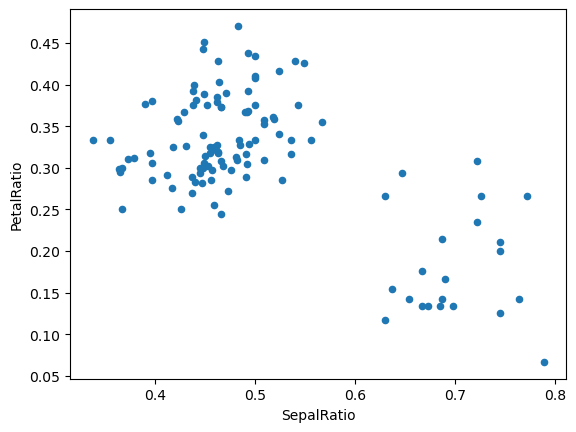

In [66]:
(
    iris.query("SepalLength > 5")
    .assign(
        SepalRatio=lambda x: x.SepalWidth / x.SepalLength,
        PetalRatio=lambda x: x.PetalWidth / x.PetalLength,
    )
    .plot(kind="scatter", x="SepalRatio", y="PetalRatio")
)

Since a function is passed in, the function is computed on the DataFrame being assigned to. Importantly, this is the DataFrame that’s been filtered to those rows with sepal length greater than 5. The filtering happens first, and then the ratio calculations. This is an example where we didn’t have a reference to the filtered DataFrame available.

The function signature for assign() is simply **kwargs. The keys are the column names for the new fields, and the values are either a value to be inserted (for example, a Series or NumPy array), or a function of one argument to be called on the DataFrame. A copy of the original DataFrame is returned, with the new values inserted.

The order of **kwargs is preserved. This allows for dependent assignment, where an expression later in **kwargs can refer to a column created earlier in the same assign().

In [67]:
dfa = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})


In [68]:
dfa.assign(C=lambda x: x["A"] + x["B"], D=lambda x: x["A"] + x["C"])  

,A,B,C,D
0,1,4,5,6
1,2,5,7,9
2,3,6,9,12


# Indexing / selection


The basics of indexing are as follows:

Operation                       |                             Syntax                                        Result

Select column                   |                             df[col]                                       Series

Select row by label             |                            df.loc[label]                                 Series

Select row by integer location  |                         df.iloc[loc]                                  Series

Slice rows                      |                        df[5:10]                                     DataFrame

Select rows by boolean vector   |                        df[bool_vec]                                   DataFram

# Row selection, for example, returns a Series whose index is the columns of the DataFrame:

In [69]:
df.loc["b"]

one            2.0
bar            2.0
flag         False
foo            bar
one_trunc      2.0
Name: b, dtype: object

In [70]:
df.iloc[2]

one           3.0
bar           3.0
flag         True
foo           bar
one_trunc     NaN
Name: c, dtype: object

# Data alignment and arithmetic

Data alignment between DataFrame objects automatically align on both the columns and the index (row labels). Again, the resulting object will have the union of the column and row labels.



In [72]:
df = pd.DataFrame(np.random.randn(10,4), columns=["A","B","C","D"])

In [73]:
df

,A,B,C,D
0,-0.082151,0.550586,-0.080437,-0.009617
1,0.936053,0.305740,0.359147,1.182918
2,1.154412,-0.713600,-1.962002,0.073533
3,1.571271,1.461959,0.549857,-0.120094
4,-0.814414,0.034266,-0.738102,-0.542865
5,0.105195,0.375390,0.462184,-0.457498
6,-1.506758,0.124726,-0.154042,-0.440120
7,0.135216,-0.381317,0.313697,0.161299
8,-0.237718,-1.326782,0.025433,0.792282
9,-0.855810,0.219536,0.824861,0.708171


In [75]:
df2 = pd.DataFrame(np.random.randn(7,3),columns=["A","B","C"])

In [76]:
df2

,A,B,C
0,-0.816311,1.259206,1.753538
1,1.369485,0.718470,-0.129378
2,-0.696945,0.600621,-0.154771
3,0.391709,1.336752,0.370164
4,-0.193015,0.380973,-0.602924
5,0.325975,1.167081,-1.588104
6,0.391411,0.333602,0.478917


In [77]:
df+df2

,A,B,C,D
0,-0.898462,1.809792,1.673101,NaN
1,2.305538,1.024210,0.229769,NaN
2,0.457468,-0.112978,-2.116773,NaN
3,1.962980,2.798711,0.920021,NaN
4,-1.007428,0.415239,-1.341026,NaN
5,0.431170,1.542470,-1.125920,NaN
6,-1.115346,0.458328,0.324875,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


When doing an operation between DataFrame and Series, the default behavior is to align the Series index on the DataFrame columns, thus broadcasting row-wise. For example:


In [78]:
df - df.iloc[0]

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,1.018204,-0.244846,0.439584,1.192535
2,1.236563,-1.264185,-1.881565,0.083150
3,1.653422,0.911373,0.630294,-0.110477
4,-0.732262,-0.516319,-0.657665,-0.533248
5,0.187346,-0.175196,0.542621,-0.447881
6,-1.424606,-0.425860,-0.073605,-0.430502
7,0.217367,-0.931902,0.394134,0.170916
8,-0.155567,-1.877367,0.105870,0.801899
9,-0.773658,-0.331050,0.905298,0.717788


Arithmetic operations with scalars operate element-wise:

In [79]:
df*5+2

,A,B,C,D
0,1.589245,4.752928,1.597815,1.951915
1,6.680263,3.528700,3.795733,7.914592
2,7.772062,-1.567999,-7.810012,2.367666
3,9.856353,9.309793,4.749286,1.399528
4,-2.072068,2.171332,-1.690509,-0.714327
5,2.525975,3.876949,4.310918,-0.287488
6,-5.533788,2.623630,1.229790,-0.200598
7,2.676080,0.093417,3.568487,2.806493
8,0.811411,-4.633910,2.127167,5.961411
9,-2.279048,3.097678,6.124305,5.540853


In [80]:
1/df

,A,B,C,D
0,-12.172695,1.816248,-12.432093,-103.981733
1,1.068316,3.270753,2.784378,0.845367
2,0.866242,-1.401346,-0.509683,13.599294
3,0.636428,0.684014,1.818654,-8.326777
4,-1.227877,29.183057,-1.354827,-1.842077
5,9.506149,2.663897,2.163642,-2.185803
6,-0.663677,8.017574,-6.491737,-2.272110
7,7.395573,-2.622493,3.187785,6.199681
8,-4.206668,-0.753703,39.318507,1.262176
9,-1.168484,4.555069,1.212325,1.412089


In [81]:
df**4

,A,B,C,D
0,0.000046,0.091897,4.186229e-05,8.554050e-09
1,0.767717,0.008738,1.663746e-02,1.958029e+00
2,1.776004,0.259310,1.481829e+01,2.923712e-05
3,6.095424,4.568149,9.141119e-02,2.080139e-04
4,0.439926,0.000001,2.968009e-01,8.684976e-02
5,0.000122,0.019858,4.563083e-02,4.380822e-02
6,5.154345,0.000242,5.630623e-04,3.752170e-02
7,0.000334,0.021142,9.683753e-03,6.768969e-04
8,0.003193,3.098833,4.184195e-07,3.940213e-01
9,0.536424,0.002323,4.629384e-01,2.515077e-01


Boolean operators operate element-wise as well:

In [87]:
df1 = pd.DataFrame({"a":[1,0,1],"b":[0,1,1]}, dtype=bool)

In [88]:
df1

,a,b
0,True,False
1,False,True
2,True,True


In [89]:
df2 = pd.DataFrame({"a":[0,1,1],"b":[1,1,0]}, dtype=bool)

In [90]:
df2

,a,b
0,False,True
1,True,True
2,True,False


In [91]:
df1&df2

,a,b
0,False,False
1,False,True
2,True,False


In [92]:
df1 | df2

,a,b
0,True,True
1,True,True
2,True,True


In [93]:
df1 ^ df2


,a,b
0,True,True
1,True,False
2,False,True


In [94]:
-df1

,a,b
0,False,True
1,True,False
2,False,False


# Transposing

To transpose, access the T attribute or DataFrame.transpose(), similar to an ndarray:



In [96]:
df[:5].T

,0,1,2,3,4
A,-0.082151,0.936053,1.154412,1.571271,-0.814414
B,0.550586,0.305740,-0.713600,1.461959,0.034266
C,-0.080437,0.359147,-1.962002,0.549857,-0.738102
D,-0.009617,1.182918,0.073533,-0.120094,-0.542865
